# Passive learning without random policy

We set a discount factor $\gamma = 1$ as we consider that future reward are very important. However, we don't set $\gamma = 1$ as we want to penalize state that are far from the solution

In [15]:
from environment import SimpleMaze
from passive_agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|.|.|.|.|.|.|.|.|.|.|.|.|
2	|.|.|.|.|.|.|.|.|.|.|.|.|
3	|.|.|.|.|.|.|.|.|.|.|.|.|
4	|.|.|.|.|.|.|.|.|.|.|.|.|
5	|.|.|.|.|.|.|.|.|.|.|.|.|
6	|C|.|.|.|.|.|.|.|.|.|.|.|



In [16]:
agent = PassiveAgentTD(env, 100, gamma=0.95, debug=False)
agent.learning()
agent.print_u_table()

[6, 0]    [5, 0]    [4, 0]    [3, 0]    [2, 0]    [1, 0]    [0, 0]    [0, 1]    [0, 2]    [0, 3]    [0, 4]    [0, 5]    [0, 6]    [0, 7]    [0, 8]    [0, 9]    [0, 10]   
0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         
-0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     -0.99     990.1     
-1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     -1.92     921.15    999.81    
-2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      -2.8      848.58    948.01    999.99    
-3.63     -3.63     -3.63     -3.63     -3.63     -3.63     -3.63     -3.63     -3.63     -3.63     -3.63     -3.63     -3.63     774.07    897.6

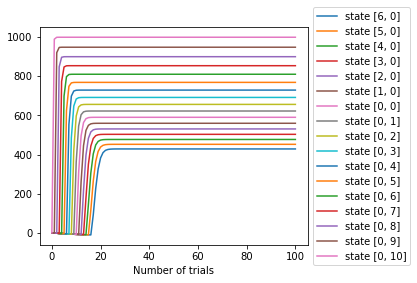

In [14]:
import matplotlib.pyplot as plt
utilities = agent.get_utilities()
visited_states = agent.get_visited_state()

fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(visited_states)):
    plt.plot(utilities[i], label="state "+str(visited_states[i]))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of trials")
plt.show()

The convergence is obtained after more or less 20 games

# Passive learning with a random policy

In [23]:

import torch
a = torch.tensor([[1,1,1],
    [2,4,7],
    [3,3,3]])

a

tensor([[1, 1, 1],
        [2, 4, 7],
        [3, 3, 3]])

In [19]:
b = torch.sum(a,1)
b

tensor([3, 6, 9])

In [24]:
b = torch.sum(a,0)
b

tensor([ 6,  8, 11])

In [21]:
b = torch.sum(a,-1)
b

tensor([3, 6, 9])

In [25]:
b = torch.sum(a,-2)
b

tensor([ 6,  8, 11])

In [26]:
max(b)

tensor(11)

In [26]:
a = torch.rand(5)
print(a)
indice = torch.argmax(a)
print("max = :"+str(a[indice]))


tensor([0.3232, 0.6396, 0.1069, 0.6217, 0.5331])
max = :tensor(0.6396)


In [30]:
a = (
    "north",
    "south",
)
print(a[1])

south


In [1]:
from environment import SimpleMaze
from active_agent import ActiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
#env.render()
agent = ActiveAgentTD(env, 100, n_min=5, q_min=2000, gamma=0.95, debug=True)
agent.learning()

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|.|.|.|.|.|.|.|.|.|.|.|.|
2	|.|.|.|.|.|.|.|.|.|.|.|.|
3	|.|.|.|.|.|.|.|.|.|.|.|.|
4	|.|.|.|.|.|.|.|.|.|.|.|.|
5	|C|.|.|.|.|.|.|.|.|.|.|.|
6	|.|.|.|.|.|.|.|.|.|.|.|.|

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|.|.|.|.|.|.|.|.|.|.|.|.|
2	|.|.|.|.|.|.|.|.|.|.|.|.|
3	|.|.|.|.|.|.|.|.|.|.|.|.|
4	|C|.|.|.|.|.|.|.|.|.|.|.|
5	|.|.|.|.|.|.|.|.|.|.|.|.|
6	|.|.|.|.|.|.|.|.|.|.|.|.|

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|.|.|.|.|.|.|.|.|.|.|.|.|
2	|.|.|.|.|.|.|.|.|.|.|.|.|
3	|C|.|.|.|.|.|.|.|.|.|.|.|
4	|.|.|.|.|.|.|.|.|.|.|.|.|
5	|.|.|.|.|.|.|.|.|.|.|.|.|
6	|.|.|.|.|.|.|.|.|.|.|.|.|

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|.|.|.|.|.|.|.|.|.|.|.|.|
2	|C|.|.|.|.|.|.|.|.|.|.|.|
3	|.|.|.|.|.|.|.|.|.|.|.|.|
4	|.|.|.|.|.|.|.|.|.|.|.|.|
5	|.|.|.|.|.|.|.|.|.|.|.|.|
6	|.|.|.|.|.|.|.|.|.|.|.|.|

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|C|.|.|.|.|.|.|.|.|.|.|.|
2	|.|.|.|.|.|.|.|.|.|.|.|.|
3	|.|.|.|.|.|.|.|.|.|.|.|.|
4	|.|.|.|.|.|.|.|.|.|.|.|.|
5	|.|.|.|.|.|.|.|.|.|.|.|.|
6	|.|.|.|.|.|.|.|.|.|.|.|.|

0	|C|.|.|.|.|.|

In [2]:
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        print("{:<8}".format(str(round(utilities[(row-1-i)*col + j].item(), 2))), end=" ")
    print()


   0        1        2        3        4        5        6        7        8        9        10       11       
0  -11.07   -10.5    -9.47    -8.42    -7.37    -6.32    -5.26    -4.21    -3.16    -2.11    -1.05    0.0      
1  -11.73   -11.16   -10.39   -9.43    -8.4     -7.37    -6.32    -5.26    -4.21    -3.16    -2.11    -1.05    
2  -12.13   -11.72   -10.93   -10.24   -9.25    -8.39    -7.36    -6.31    -5.26    -4.21    -3.16    -2.11    
3  -12.78   -12.1    -11.48   -10.76   -10.1    -9.27    -8.25    -7.32    -6.31    -5.26    -4.21    -3.16    
4  -13.57   -12.89   -12.32   -11.41   -10.59   -9.8     -9.04    -8.22    -7.3     -6.28    -5.26    -4.21    
5  -14.27   -13.6    -12.93   -12.05   -11.37   -10.52   -9.61    -8.84    -7.88    -7.12    -6.28    -5.26    
6  -15.05   -14.23   -13.3    -12.52   -11.56   -11.07   -10.27   -9.48    -8.59    -7.72    -7.15    -6.29    


In [8]:
import torch
a = torch.rand(5)
print(a[0])

tensor(0.8301)
